### *CIS 2450: Final Project*
# **Predicting Housing Prices based on Property Features.**
**Students:** *Maya Kfir and Elize Dracopoulos*
### **Introduction**

This project aims to demonstrate the big data analytics skills and tools we have learned during the Fall 2024 semester in the CIS 2450 course. By analyzing various attributes such as property type, size (square feet), number of rooms, amenities, and location (state and region), this project seeks to provide insights that can help potential buyers make informed decisions and maximize their investments.

* **Goal:** Predict the price of a property based on its features.

### **Part I:** Setup and Data Import

#### **1.1 Import Libraries**
*We begin by installing and importing necessary Python libraries for data analysis, visualization, and machine learning.*

In [1]:
# Install the required packages
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install scipy
%pip install xgboost
%pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Develop

In [2]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### **1.2 Load Dataset**
The dataset, "USA_Housing," contains information about residential properties across the US, including features such as price, size, and amenities.

It is loaded from a CSV file stored locally on the desktop. Ensure the file path is correct before proceeding.


In [3]:
# TODO: Update the 'user_name' with your username
user_name = 'elizedracopoulos'

# Load the dataset from desktop
file_path = f'/Users/{user_name}/Desktop/USAhousing.csv'
housing_df = pd.read_csv(file_path)

In [4]:
housing_df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


### **Part II:** Data Cleaning and Preprocessing

##### **2.1 Initial Data Inspection: Raw Data**
*Gain a preliminary understanding of the dataset to assess its structure, data types, dimensions, and missing values. This step helps identify potential issues and informs subsequent cleaning and preprocessing decisions.*


In [5]:
# Dataset preview
print("\n*** First Five Rows of the Dataset ***\n")
print(housing_df.head())

# Initial inspection of the dataset
print("\n*** Dataset Info ***\n")
housing_df.info()


*** First Five Rows of the Dataset ***

           id                                                url  \
0  7049044568  https://reno.craigslist.org/apa/d/reno-beautif...   
1  7049047186  https://reno.craigslist.org/apa/d/reno-reduced...   
2  7043634882  https://reno.craigslist.org/apa/d/sparks-state...   
3  7049045324  https://reno.craigslist.org/apa/d/reno-1x1-fir...   
4  7049043759  https://reno.craigslist.org/apa/d/reno-no-long...   

         region                   region_url  price       type  sqfeet  beds  \
0  reno / tahoe  https://reno.craigslist.org   1148  apartment    1078     3   
1  reno / tahoe  https://reno.craigslist.org   1200      condo    1001     2   
2  reno / tahoe  https://reno.craigslist.org   1813  apartment    1683     2   
3  reno / tahoe  https://reno.craigslist.org   1095  apartment     708     1   
4  reno / tahoe  https://reno.craigslist.org    289  apartment     250     0   

   baths  cats_allowed  ...  wheelchair_access  electric_vehicle_char

In [6]:
# Summary statistics for numerical columns
print("\n*** Summary Statistics ***\n")
print(housing_df.describe())


*** Summary Statistics ***

                 id         price        sqfeet           beds          baths  \
count  3.849770e+05  3.849770e+05  3.849770e+05  384977.000000  384977.000000   
mean   7.040982e+09  8.825722e+03  1.059900e+03       1.905345       1.480718   
std    8.800376e+06  4.462200e+06  1.915076e+04       3.494572       0.618061   
min    7.003808e+09  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    7.035979e+09  8.050000e+02  7.500000e+02       1.000000       1.000000   
50%    7.043320e+09  1.036000e+03  9.490000e+02       2.000000       1.000000   
75%    7.048426e+09  1.395000e+03  1.150000e+03       2.000000       2.000000   
max    7.051292e+09  2.768307e+09  8.388607e+06    1100.000000      75.000000   

        cats_allowed   dogs_allowed  smoking_allowed  wheelchair_access  \
count  384977.000000  384977.000000    384977.000000      384977.000000   
mean        0.726890       0.707918         0.731771           0.082111   
std         0.44

In [7]:
# Dataset dimensions
print("\nDataset Dimensions:")
print(f"Number of rows: {housing_df.shape[0]}, Number of columns: {housing_df.shape[1]}")

# Column names
print("\nColumn Names:")
print(housing_df.columns.tolist())


Dataset Dimensions:
Number of rows: 384977, Number of columns: 22

Column Names:
['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'image_url', 'description', 'lat', 'long', 'state']


In [8]:
# Backup the raw dataset for reference
housing_df_raw = housing_df.copy()

##### **2.2 Column Renaming**
*Rename columns to ensure consistency and clarity. Clear and uniform column names improve readability and reduce the chance of errors during analysis.*

In [9]:
# Rename columns for consistency
rename_map = {
    "sqfeet": "square_feet",
    "baths": "bathrooms",
    "beds": "bedrooms",
    "comes_furnished": "furnished",
    "electric_vehicle_charge": "ev_charging",
    "laundry_options": "laundry",
    "parking_options": "parking"
}
housing_df.rename(columns=rename_map, inplace=True)

In [10]:
print("\nRenamed Columns:")
print(housing_df.columns.tolist())


Renamed Columns:
['id', 'url', 'region', 'region_url', 'price', 'type', 'square_feet', 'bedrooms', 'bathrooms', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'ev_charging', 'furnished', 'laundry', 'parking', 'image_url', 'description', 'lat', 'long', 'state']


##### **2.3 Type Conversion**
*Ensure numerical columns are properly represented as floats and categorical/object columns as strings.*

In [11]:
# Convert numerical columns to floats
numeric_cols = ["price", "square_feet", "bedrooms", "bathrooms", "lat", "long"]
housing_df[numeric_cols] = housing_df[numeric_cols].astype(float)

# Convert object columns to strings for consistency
object_cols = housing_df.select_dtypes(include="object").columns
housing_df[object_cols] = housing_df[object_cols].astype("string")

In [12]:
print("\nUpdated Data Types:")
print(housing_df.dtypes)


Updated Data Types:
id                            int64
url                  string[python]
region               string[python]
region_url           string[python]
price                       float64
type                 string[python]
square_feet                 float64
bedrooms                    float64
bathrooms                   float64
cats_allowed                  int64
dogs_allowed                  int64
smoking_allowed               int64
wheelchair_access             int64
ev_charging                   int64
furnished                     int64
laundry              string[python]
parking              string[python]
image_url            string[python]
description          string[python]
lat                         float64
long                        float64
state                string[python]
dtype: object


##### **2.4 Handle Missing Values**
*Identify and handle missing values using appropriate methods:*

1.	Fill categorical features (laundry, parking) with “none.”

2.	Fill description with an empty string.

3.	Impute lat and long with state-specific means for better geographic accuracy.

In [13]:
# Identify missing values
missing_values = housing_df.isnull().sum().sort_values(ascending=False)
print("\n** Missing Values Summary **\n", missing_values[missing_values > 0])

# Fill categorical columns with appropriate placeholders
housing_df["laundry"].fillna("none", inplace=True)
housing_df["parking"].fillna("none", inplace=True)
housing_df["description"].fillna("", inplace=True)

# Impute latitude and longitude with state-specific means
state_lat_means = housing_df.groupby("state")["lat"].mean()
state_long_means = housing_df.groupby("state")["long"].mean()

for state in housing_df["state"].unique():
    housing_df.loc[(housing_df["state"] == state) & (housing_df["lat"].isnull()), "lat"] = state_lat_means[state]
    housing_df.loc[(housing_df["state"] == state) & (housing_df["long"].isnull()), "long"] = state_long_means[state]

# Validate no remaining missing values
print("\nRemaining Missing Values:")
print(housing_df.isnull().sum().sum())


** Missing Values Summary **
 parking        140687
laundry         79026
long             1918
lat              1918
description         2
dtype: int64


/var/folders/b9/zy8bc_0s3478dfjm1mbkyjhm0000gn/T/ipykernel_75009/1298106934.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df["laundry"].fillna("none", inplace=True)
/var/folders/b9/zy8bc_0s3478dfjm1mbkyjhm0000gn/T/ipykernel_75009/1298106934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al


Remaining Missing Values:
0


In [14]:
# Validate no remaining missing values
print("\nRemaining Missing Values:")
print(housing_df.isnull().sum().sum())


Remaining Missing Values:
0


##### **2.5 Remove Irrelevant Features**
*Drop columns that are not useful for analysis or predictive modeling, such as IDs, URLs, or redundant information.*

In [15]:
# Drop irrelevant columns
drop_cols = ["id", "url", "region_url", "image_url", "description"]
housing_df.drop(columns=drop_cols, inplace=True)

print("\nRemaining Columns After Dropping Irrelevant Features:")
print(housing_df.columns.tolist())


Remaining Columns After Dropping Irrelevant Features:
['region', 'price', 'type', 'square_feet', 'bedrooms', 'bathrooms', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'ev_charging', 'furnished', 'laundry', 'parking', 'lat', 'long', 'state']


##### **2.6 Remove Duplicates**
*Remove duplicate rows to ensure data consistency and avoid bias in the analysis.*

In [16]:
# Check and remove duplicates
duplicate_count = housing_df.duplicated().sum()
print(f"\n** Duplicate Rows Count: {duplicate_count} **")

# Drop duplicates
housing_df.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {housing_df.shape}")


** Duplicate Rows Count: 191384 **
Dataset shape after removing duplicates: (193593, 17)


##### **2.7 Final Validation**

In [17]:
# Validate the dataset's readiness
print("\nFinal Dataset Shape:")
print(housing_df.shape)

print("\nFinal Column Data Types:")
print(housing_df.dtypes)

print("\nFinal Missing Values Check:")
print(housing_df.isnull().sum().sum())

# Indicate completion
print("\nData Cleaning and Preprocessing Completed Successfully.")


Final Dataset Shape:
(193593, 17)

Final Column Data Types:
region               string[python]
price                       float64
type                 string[python]
square_feet                 float64
bedrooms                    float64
bathrooms                   float64
cats_allowed                  int64
dogs_allowed                  int64
smoking_allowed               int64
wheelchair_access             int64
ev_charging                   int64
furnished                     int64
laundry              string[python]
parking              string[python]
lat                         float64
long                        float64
state                string[python]
dtype: object

Final Missing Values Check:
0

Data Cleaning and Preprocessing Completed Successfully.


### **Part III:** Exploratory Data Analysis (EDA)

*This section investigates the dataset to understand the relationships between features and the target variable, as well as the overall data distribution.*

*This analysis focuses on uncovering patterns and addressing potential issues like outliers and skewness.*

##### **3.1 Target Variable Analysis: Price Distribution**

*Analyze the distribution of the `price` variable to identify skewness, outliers, and unusual patterns.*

*Apply log-transformation to normalize the data, improve intrpretability, and prepare it for ML models.*

In [18]:
# Format describe() results for 'price' into readable currency format
price_stats = housing_df['price'].describe()

formatted_stats = {
    "Count": int(price_stats['count']),
    "Mean": f"${price_stats['mean']:,.2f}",
    "Std Dev": f"${price_stats['std']:,.2f}",
    "Min": f"${price_stats['min']:,.2f}",
    "25%": f"${price_stats['25%']:,.2f}",
    "Median (50%)": f"${price_stats['50%']:,.2f}",
    "75%": f"${price_stats['75%']:,.2f}",
    "Max": f"${price_stats['max']:,.2f}",
}

print("\n**Formatted Price Statistics**")
for stat, value in formatted_stats.items():
    print(f"{stat}: {value}")


**Formatted Price Statistics**
Count: 193593
Mean: $16,276.77
Std Dev: $6,292,328.88
Min: $0.00
25%: $859.00
Median (50%): $1,144.00
75%: $1,530.00
Max: $2,768,307,249.00


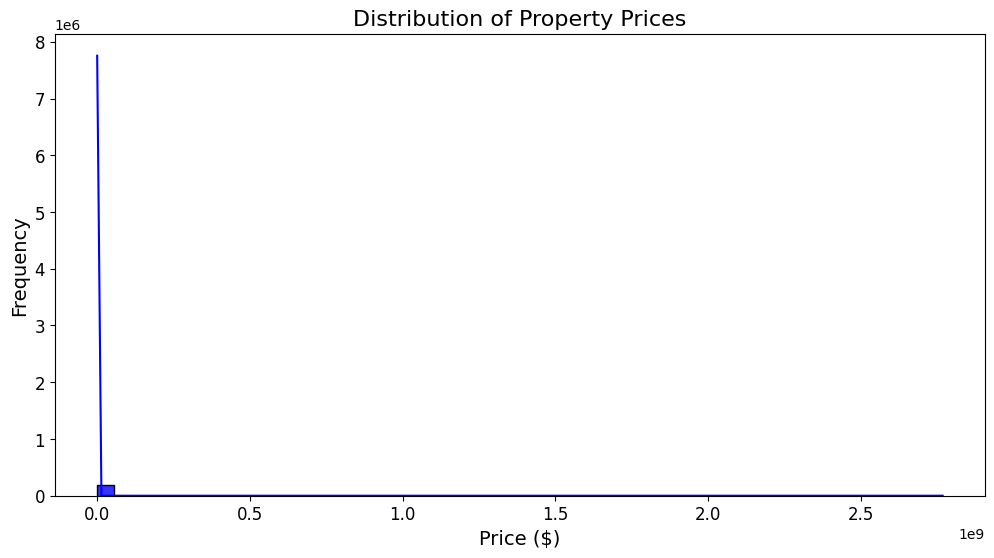

Skewness of Price: 439.86069681540044


In [19]:
# Distribution of 'price'
plt.figure(figsize=(12, 6))
sns.histplot(housing_df['price'], bins=50, kde=True, color='blue', alpha=0.8)
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Skewness calculation
from scipy.stats import skew
print(f"Skewness of Price: {skew(housing_df['price'])}")

As we see above, the target variable price is not normally distributed:

* The **mean** price ($10,521.90) is significantly larger than the **median** price ($1,093.00), indicating a right-skewed distribution caused by extreme outliers.

* **Minimum** ($0) and **maximum** ($2.7 billion) suggest data quality issues or outliers that need addressing.

* The high **standard deviation** ($4.9 million) highlights the spread dominated by outliers.

*This can hinder the performance of the ML regression model, leading to biased predictions that poorly represent most properties. To address this, we will apply a log-transformation to normalize the data and rerepresent the price distribution.*

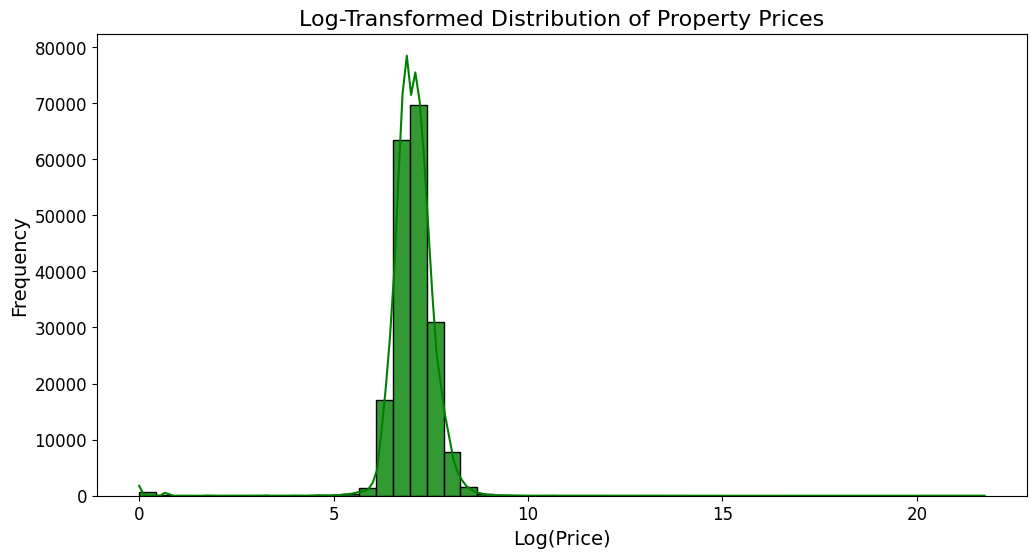

Skewness of Log-Transformed Price: -4.347962937193588


In [20]:
# Log-transform the price column and replot
housing_df['log_price'] = np.log1p(housing_df['price'])

plt.figure(figsize=(12, 6))
sns.histplot(housing_df['log_price'], bins=50, kde=True, color='green', alpha=0.8)
plt.title('Log-Transformed Distribution of Property Prices', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Log-transformed skewness
print(f"Skewness of Log-Transformed Price: {skew(housing_df['log_price'])}")

We will now define a threshold for outliers at $2M to filter extreme values that may distort the distribution:

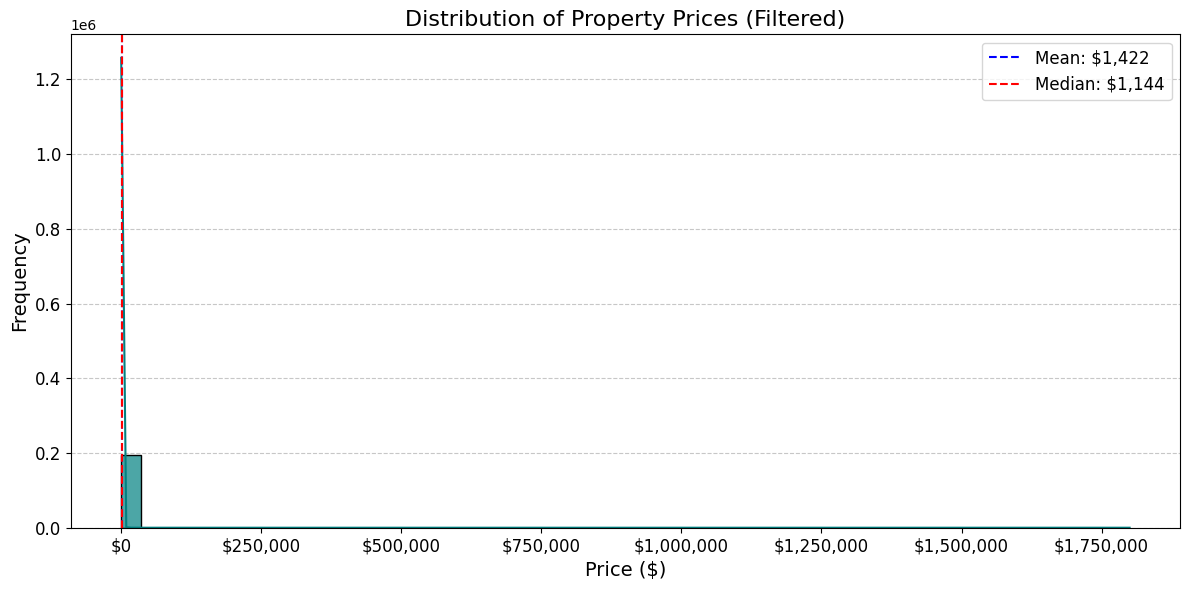

Skewness of Filtered Price: 104.57681442161243


In [21]:
# Remove extreme outliers above $2M
upper_limit = 2000000
housing_df = housing_df[housing_df['price'] <= upper_limit]

# Replot the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(housing_df['price'], bins=50, kde=True, color='teal', alpha=0.7)
plt.title('Distribution of Property Prices (Filtered)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Format x-axis to show monetary values
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for mean and median
mean_price = housing_df['price'].mean()
median_price = housing_df['price'].median()
plt.axvline(mean_price, color='blue', linestyle='--', label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: ${median_price:,.0f}')
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print(f"Skewness of Filtered Price: {skew(housing_df['price'])}")

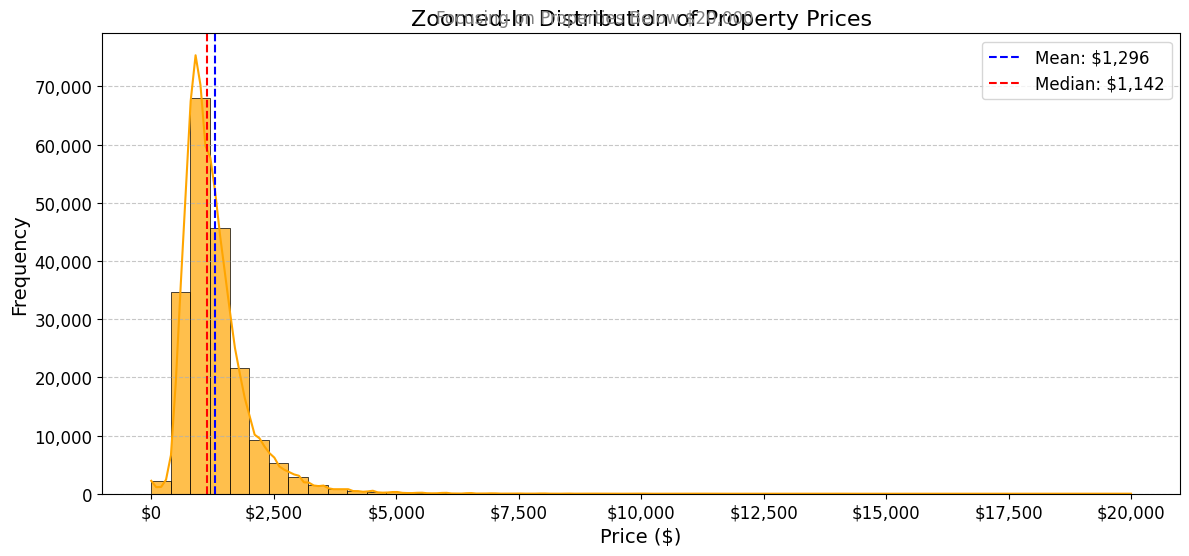

Mean of Zoomed Prices: $1,296.31
Median of Zoomed Prices: $1,142.00
Skewness of Zoomed Prices: 4.615040490879877


In [22]:
# Zoom in on prices below a certain threshold
zoom_threshold = 20000
zoomed_df = housing_df[housing_df['price'] <= zoom_threshold]

plt.figure(figsize=(12, 6))
sns.histplot(zoomed_df['price'], bins=50, kde=True, color='orange', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.title('Zoomed-In Distribution of Property Prices', fontsize=16)
plt.suptitle('Focusing on Properties Below $20,000', fontsize=12, color='gray', y=0.92)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Format x-axis to show monetary values
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for mean and median
mean_price_zoomed = zoomed_df['price'].mean()
median_price_zoomed = zoomed_df['price'].median()
plt.axvline(mean_price_zoomed, color='blue', linestyle='--', label=f'Mean: ${mean_price_zoomed:,.0f}')
plt.axvline(median_price_zoomed, color='red', linestyle='--', label=f'Median: ${median_price_zoomed:,.0f}')
plt.legend(fontsize=12, loc='upper right', frameon=True)

# Add padding to layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Print mean, median, and skewness for zoomed-in prices
print(f"Mean of Zoomed Prices: ${mean_price_zoomed:,.2f}")
print(f"Median of Zoomed Prices: ${median_price_zoomed:,.2f}")
print(f"Skewness of Zoomed Prices: {skew(zoomed_df['price'])}")

* Outliers above $2M significantly distort the price distribution and are removed for better clarity.

* Zooming in on prices below $20,000 reveals the majority of property prices cluster below this threshold.

* Even at this scale, the distribution remains slightly right-skewed.

##### **3.2 Numerical Feature Analysis**
*Explore numerical features (square_feet, bedrooms, bathrooms) to uncover correlations with price.*

**Pairplot**

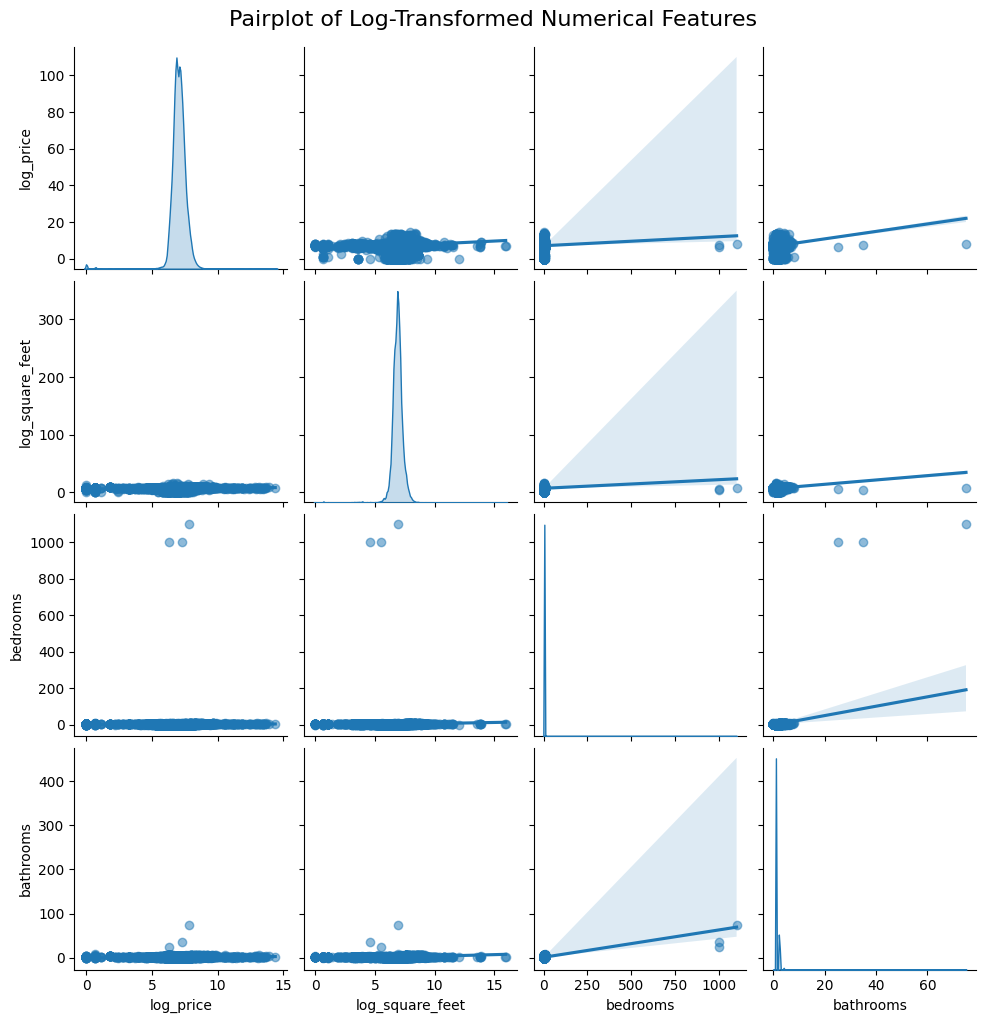

In [23]:
# Apply log transformation to price and square feet for better visualization
housing_df['log_price'] = np.log1p(housing_df['price'])
housing_df['log_square_feet'] = np.log1p(housing_df['square_feet'])

# Numerical features for pairplot
numerical_features = ['log_price', 'log_square_feet', 'bedrooms', 'bathrooms']

# Pairplot
sns.pairplot(housing_df, vars=numerical_features, diag_kind='kde', kind='reg', height=2.5, plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Pairplot of Log-Transformed Numerical Features', y=1.02, fontsize=16)
plt.show()

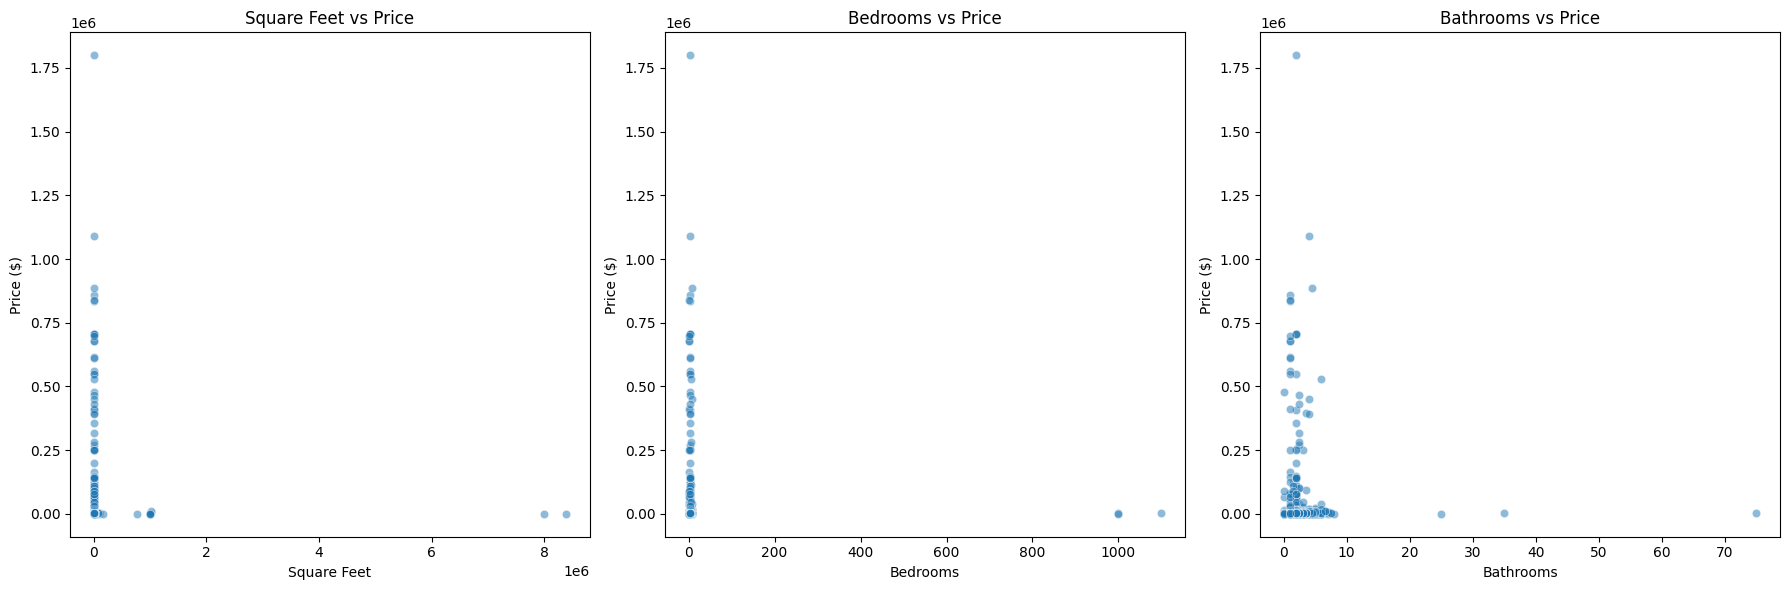


Correlation Coefficients:
                 price  square_feet  bedrooms  bathrooms
price        1.000000     0.001056  0.007039   0.035858
square_feet  0.001056     1.000000  0.002753   0.008429
bedrooms     0.007039     0.002753  1.000000   0.399228
bathrooms    0.035858     0.008429  0.399228   1.000000


In [24]:
# Scatter plots to explore relationships between numerical features and price
plt.figure(figsize=(18, 6))

# Square Feet vs Price
plt.subplot(1, 3, 1)
sns.scatterplot(data=housing_df, x='square_feet', y='price', alpha=0.5)
plt.title('Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')

# Bedrooms vs Price
plt.subplot(1, 3, 2)
sns.scatterplot(data=housing_df, x='bedrooms', y='price', alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')

# Bathrooms vs Price
plt.subplot(1, 3, 3)
sns.scatterplot(data=housing_df, x='bathrooms', y='price', alpha=0.5)
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_matrix = housing_df[['price', 'square_feet', 'bedrooms', 'bathrooms']].corr()
print("\nCorrelation Coefficients:\n", correlation_matrix)

* `log_price` and `log_square_feet` show a strong positive correlation, indicating larger properties are generally more expensive.

* Features like bedrooms and bathrooms also show positive relationships with price, though weaker compared to `square_feet`.

**Correlation Heatmap**


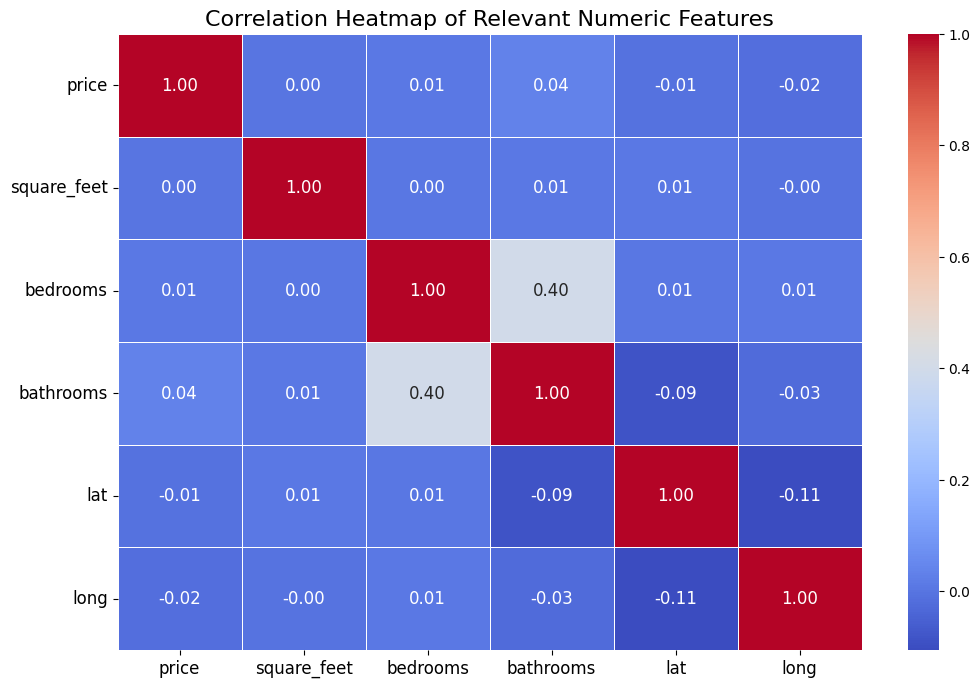

In [25]:
# Select relevant numeric columns for correlation analysis
relevant_numeric_cols = ['price', 'square_feet', 'bedrooms', 'bathrooms', 'lat', 'long']

# Calculate the correlation matrix
correlation_matrix = housing_df[relevant_numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12})

# Add titles and labels
plt.title('Correlation Heatmap of Relevant Numeric Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.show()

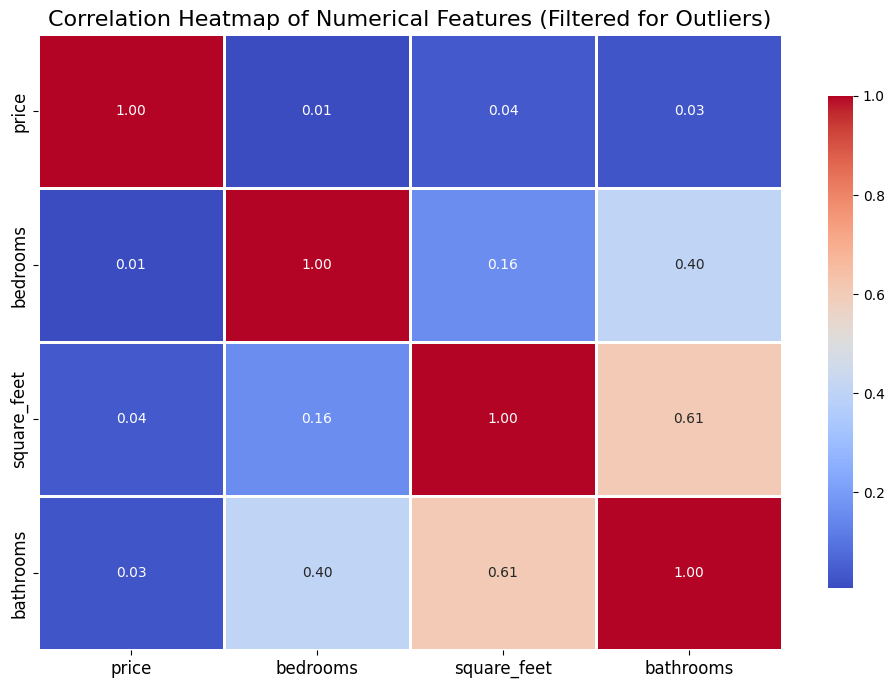

In [26]:
from scipy.cluster.hierarchy import linkage, leaves_list

# Define a realistic threshold for square_feet
threshold = housing_df['square_feet'].quantile(0.99)  # 99th percentile

# Filter out extreme outliers
filtered_df = housing_df[housing_df['square_feet'] <= threshold]

# Recompute correlation matrix
correlation_matrix = filtered_df[['price', 'square_feet', 'bedrooms', 'bathrooms']].corr()

# Use hierarchical clustering to reorder the matrix
linkage_matrix = linkage(correlation_matrix, method='ward')
feature_order = leaves_list(linkage_matrix)
ordered_features = [correlation_matrix.columns[i] for i in feature_order]

# Reorder correlation matrix
correlation_matrix = correlation_matrix.loc[ordered_features, ordered_features]

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features (Filtered for Outliers)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### **3.3 Categorical Feature Analysis**
*Analyzes categorical features (property_type, state, region) to understand their distribution, relationships and potential impact on price.*

**Features Analysed:**

* *Property Type:* Single Family, Condo, Townhouse, Multi-Family, Land, Other.

* *Laundry Facilities:* Washer/Dryer, In-Unit, On-Site, None.

* *Parking Facilities:* Garage, Valet, Off-Street, On-Street, None.

* *Furnish Status:* Furnished, Unfurnished.

**Bar Plots for Categorical Features**

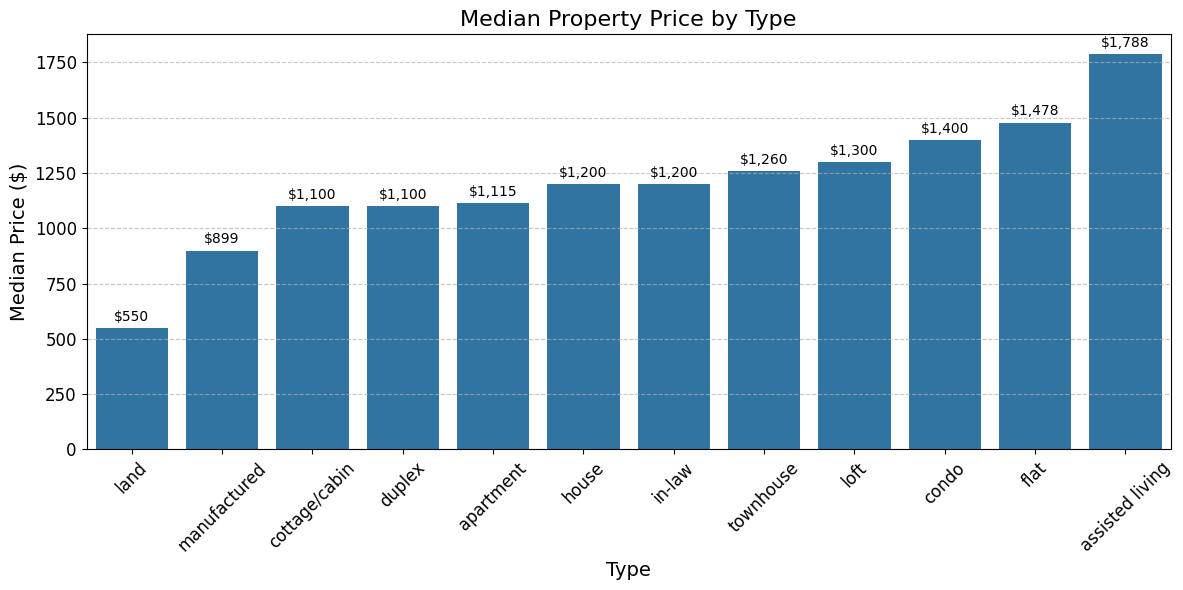

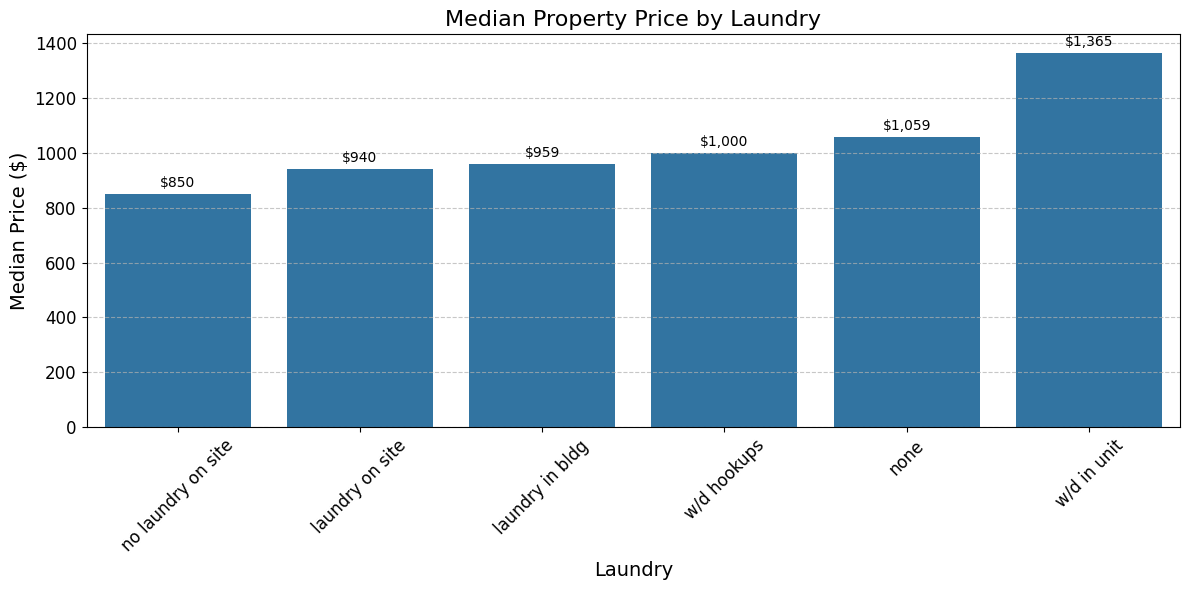

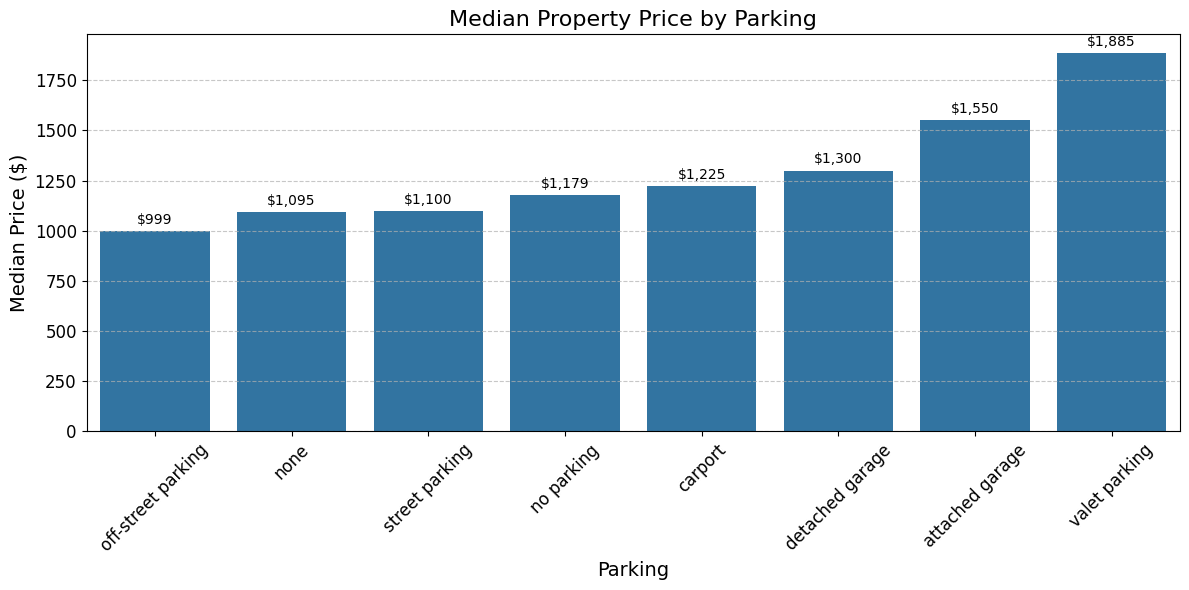

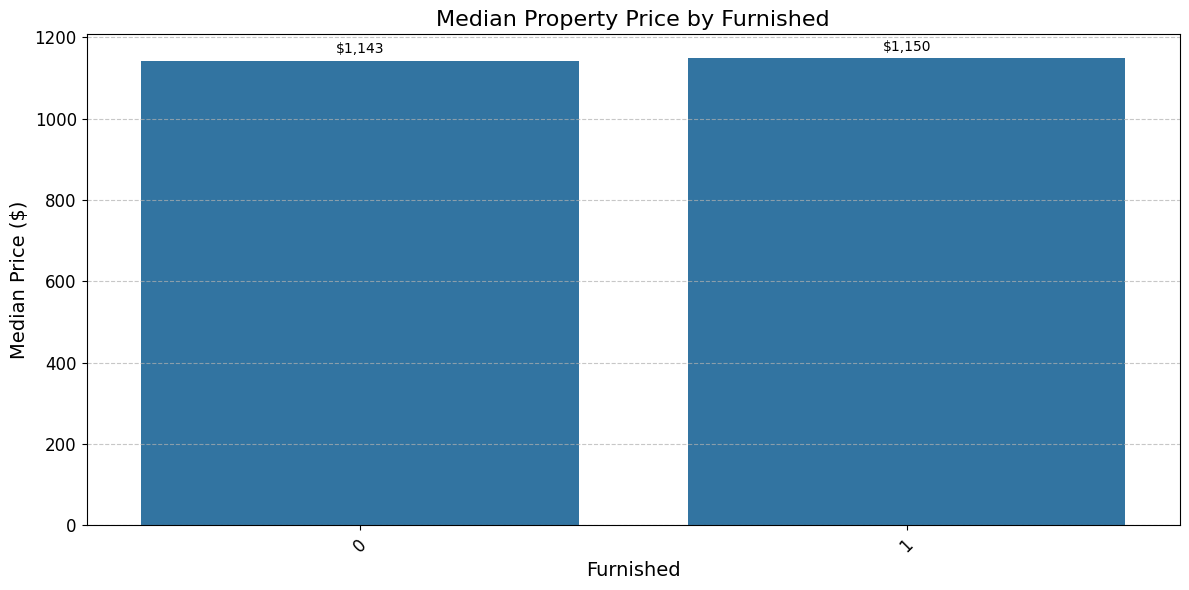

In [27]:
# Categorical Features
categorical_features = ['type', 'laundry', 'parking', 'furnished']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))

    # Sort categories by median price
    sorted_data = housing_df.groupby(feature)['price'].median().sort_values().index
    ax = sns.barplot(data=housing_df, x=feature, y='price', estimator=np.median, errorbar=None, order=sorted_data)

    # Annotate median value
    for p in ax.patches:
        ax.annotate(f'${p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 8), textcoords='offset points')

    # Plot
    plt.title(f'Median Property Price by {feature.title()}', fontsize=16)
    plt.xlabel(feature.title(), fontsize=14)
    plt.ylabel('Median Price ($)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

**Key Observations**

* **Property Type:** 
    * Single-family homes are the most common property type, followed by condos and townhomes.
    * Assisted living properties have the highest median prices.
    * Manufactured homes and in-law units are the least expensive.

* **Laundry:** Properties with w/d in unit command the highest median price, emphasizing tenant preference for convenience.

* **Parking:** Premium options like valet parking and attached garages significantly increase property prices.

* **Furnishing:** Furnishing status has minimal impact on property prices, with similar medians for furnished and unfurnished properties

##### **3.4 Geographical Analysis**
*Investigate the geographical distribution of properties across states and regions to identify trends and regional price variations.*

**Average Property Price by State**

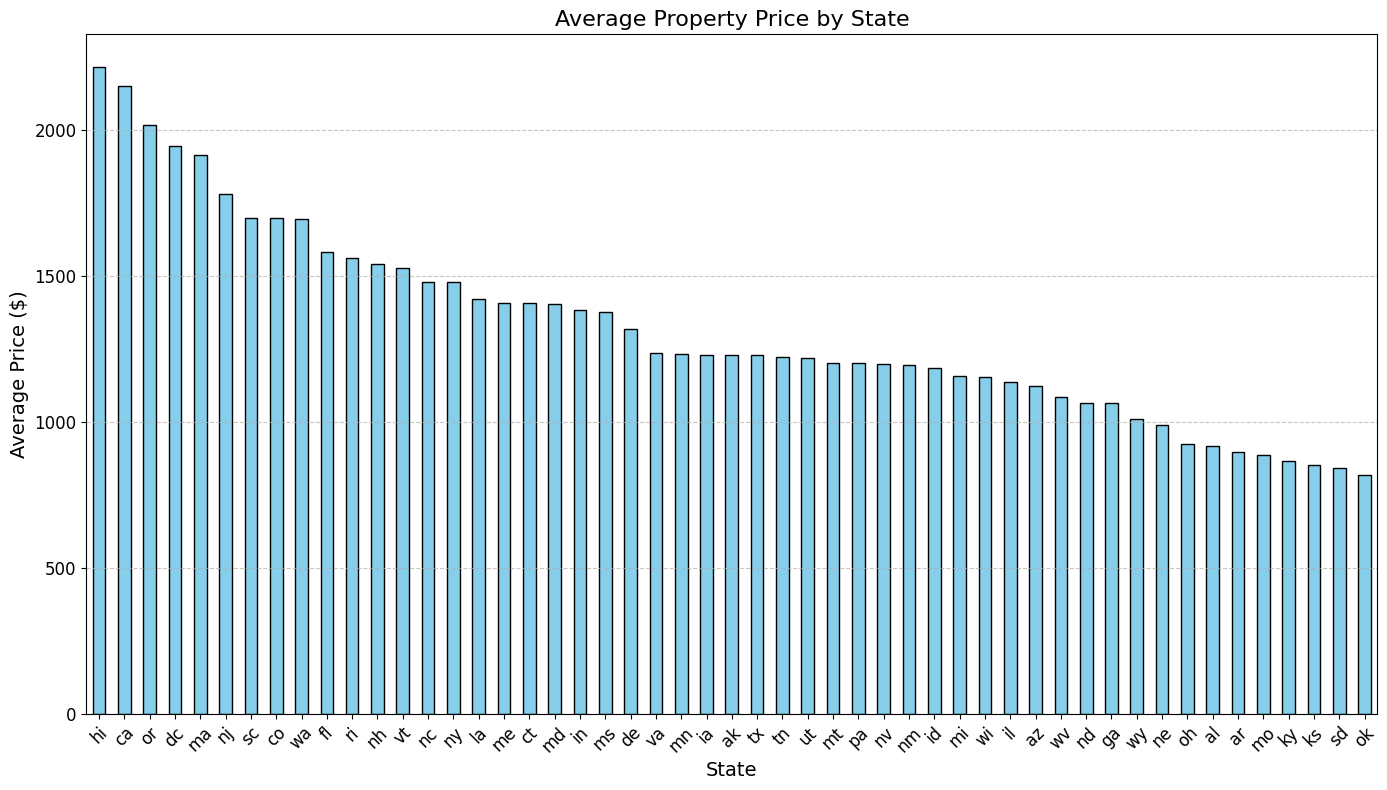

In [28]:
# Calculate average price by state
state_avg_prices = housing_df.groupby('state')['price'].mean().sort_values(ascending=False)

# Plot average price by state
plt.figure(figsize=(14, 8))
state_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Property Price by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* California, New York, Hawaii, and DC have the highest average property prices, likely due limited land and demand, reflecting their status as high-cost real estate markets.

* Affordable states such as Oklahoma, Kansas, and Mississippi have the lowest average prices, reflecting lower demand and cost of living.

This figure guides us to potentially classify properties into broader US regions (e.g., East Coast, West Coast, Midwest) to gain deeper insights.

**Geographical Heatmap of Latitude, Longitude, and Price**

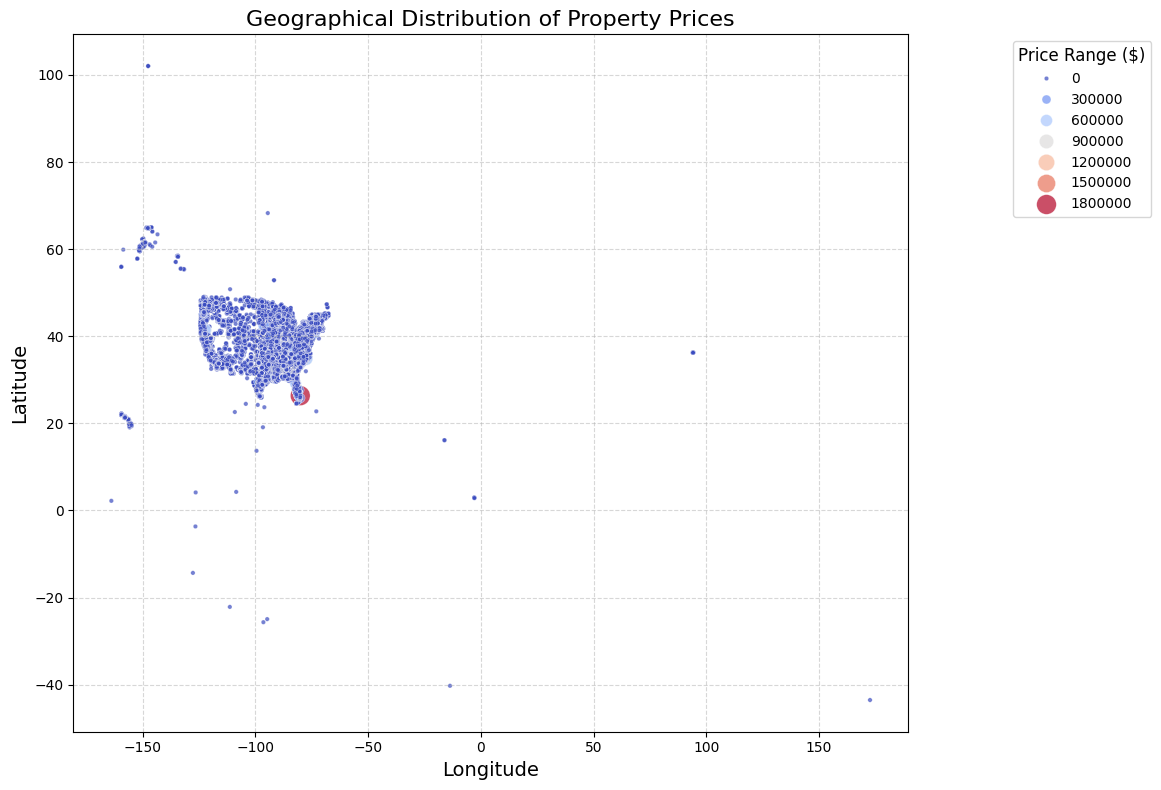

In [29]:
# Scatter heatmap of lat, long vs. price
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=housing_df,
    x='long', y='lat', hue='price', palette='coolwarm', size='price', sizes=(10, 200), alpha=0.7
)

# Adjust legend for better readability
scatter.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Price Range ($)', fontsize=10, title_fontsize=12)

plt.title('Geographical Distribution of Property Prices', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

We observe that there are several points outside the US latitude and longitude ranges (in oceans or other continents), indicating potential outliers. These points may distort the analysis and lead to inaccurate conclusions.

Therfore, we will filter out these outliers and zoom-in on the US region for a more focused analysis.

**Filtering Non-US Points**

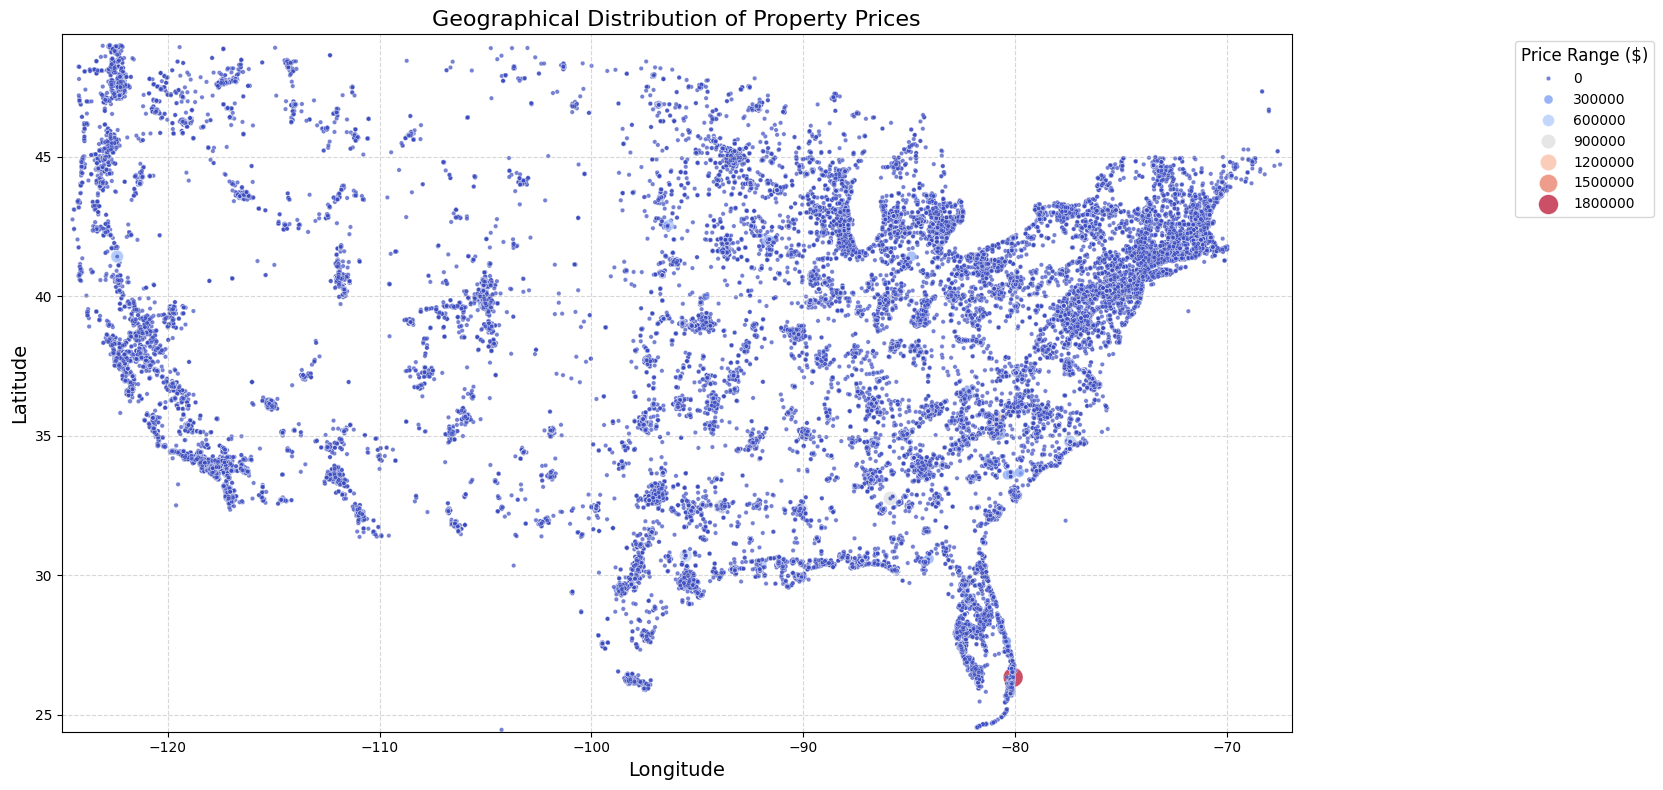

In [30]:
# Define US latitude and longitude bounds
us_lat_min, us_lat_max = 24.396308, 49.384358
us_long_min, us_long_max = -125.0, -66.93457

# Filter properties within US bounds
housing_df = housing_df[
    (housing_df['lat'] >= us_lat_min) & (housing_df['lat'] <= us_lat_max) &
    (housing_df['long'] >= us_long_min) & (housing_df['long'] <= us_long_max)
]

# Scatterplot after removing outliers
plt.figure(figsize=(17, 8))
scatter = sns.scatterplot(
    data=housing_df,
    x='long', y='lat', hue='price', palette='coolwarm', size='price', sizes=(10, 200), alpha=0.7
)

# Adjust legend
scatter.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Price Range ($)', fontsize=10, title_fontsize=12)

plt.title('Geographical Distribution of Property Prices', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(us_long_min, us_long_max)
plt.ylim(us_lat_min, us_lat_max)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Annotating High-Price Clusters**

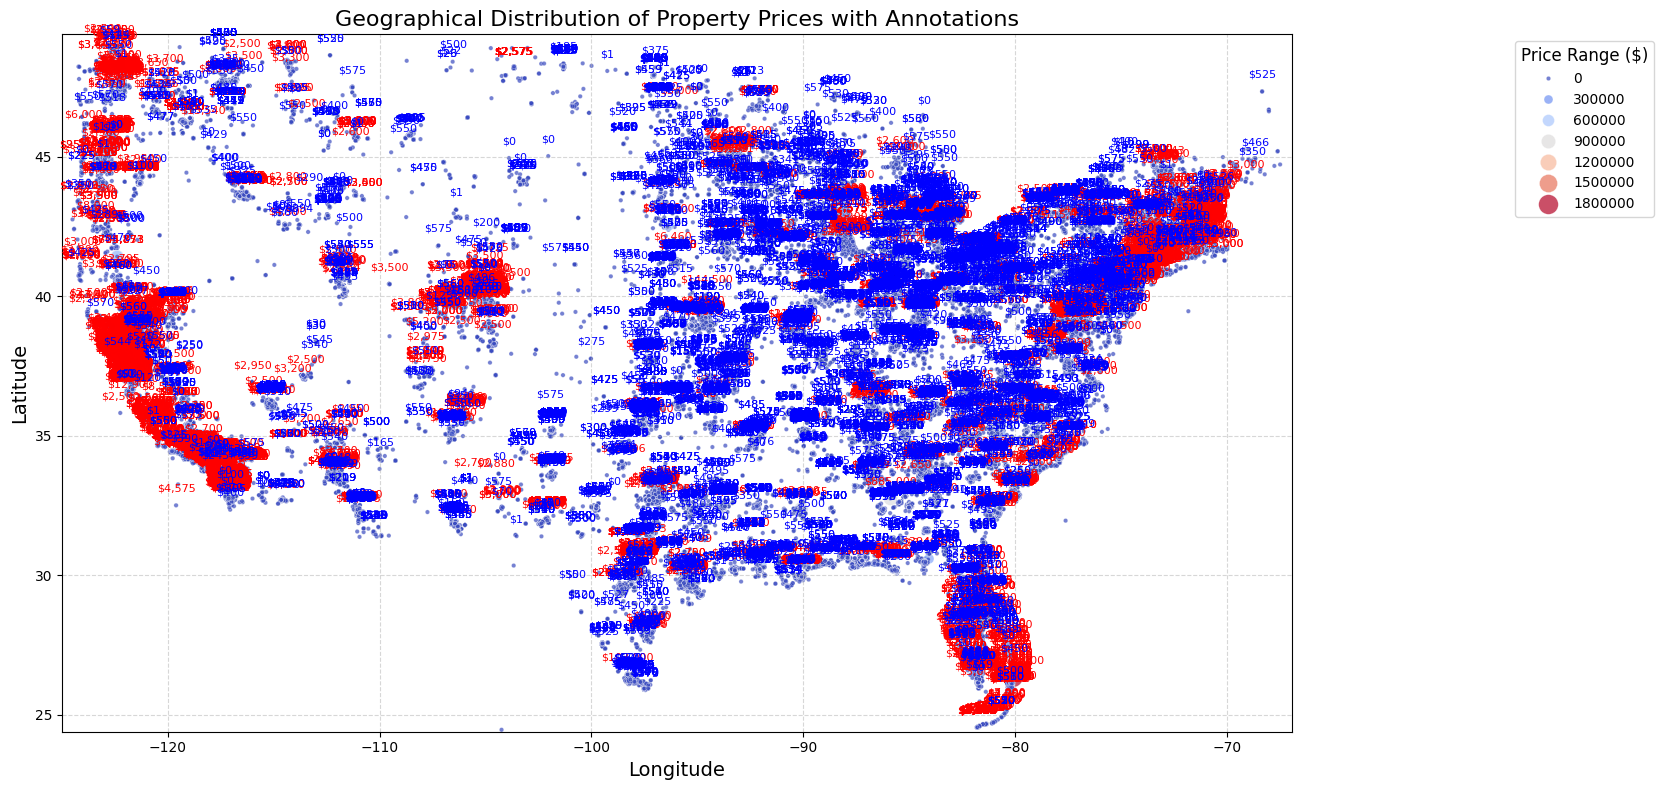

In [31]:
# Define high-price and low-price thresholds
high_price_threshold = housing_df['price'].quantile(0.95)
low_price_threshold = housing_df['price'].quantile(0.05)

# Identify high-price and low-price clusters
high_price_clusters = housing_df[housing_df['price'] >= high_price_threshold]
low_price_clusters = housing_df[housing_df['price'] <= low_price_threshold]

# Scatterplot with annotations
plt.figure(figsize=(17, 8))
scatter = sns.scatterplot(
    data=housing_df,
    x='long', y='lat', hue='price', palette='coolwarm', size='price', sizes=(10, 200), alpha=0.7
)

# Annotate high-price clusters
for idx, row in high_price_clusters.iterrows():
    plt.annotate(
        f"${row['price']:,.0f}",
        (row['long'], row['lat']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='red'
    )

# Annotate low-price clusters
for idx, row in low_price_clusters.iterrows():
    plt.annotate(
        f"${row['price']:,.0f}",
        (row['long'], row['lat']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='blue'
    )

# Adjust legend
scatter.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Price Range ($)', fontsize=10, title_fontsize=12)

plt.title('Geographical Distribution of Property Prices with Annotations', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(us_long_min, us_long_max)
plt.ylim(us_lat_min, us_lat_max)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatterplot above visualizes the geographical distribution of property prices across different regions. The color of the points represent the price of the properties, with red points indicating higher prices.


**Geographical Patterns Observation**

* High-price clusters are predominantly located in coastal regions and major metropolitan areas, such as California and New York.

* Low-price clusters are more dispersed and often found in less densely populated areas.

* Filtering geographic outliers enhances clarity, removing noise from invalid data points.

##### **3.5 Encoding**
*To prepare our dataset for machine learning models, we need to transform categorical variables into numerical representations. This process ensures that our models can interpret and utilize these features effectively.*

**Ordinal Encoding for Property Type**

Encodes type feature with ranks based on their average price, allowing the model to capture the influence of property type on price.

Property types with higher average prices receive higher numeric values.

In [32]:
type_rank_df = housing_df.groupby('type')['price'].mean().reset_index().sort_values(by='price', ascending=False).reset_index(drop=True)

# Map property types to numerical rankings based on their influence on price
type_mapping = {type_row['type']: idx + 1 for idx, type_row in type_rank_df.iterrows()}

# Apply the mapping to the `type` column
housing_df['type_encoded'] = housing_df['type'].map(type_mapping)

# Display the mapping
print("Ordinal Encoding for 'type':")
print(type_mapping)

Ordinal Encoding for 'type':
{'land': 1, 'assisted living': 2, 'manufactured': 3, 'cottage/cabin': 4, 'house': 5, 'townhouse': 6, 'condo': 7, 'flat': 8, 'loft': 9, 'duplex': 10, 'apartment': 11, 'in-law': 12}


**One-Hot Encoding for Nominal Features**

Features like `laundry`, `parking`, `state`, and `furnished` do not have a natural ranking, so we use one-hot encoding to creates binary indicator variables for each category.

This method ensures no loss of information and prevents the model from interpreting ordinal relationships where none exist.

In [33]:
# One-hot encode state, laundry and parking features
encoded_features = pd.get_dummies(housing_df[['laundry', 'parking', 'state']], drop_first=True)

# Combine the one-hot encoded features with the original dataframe
housing_df = pd.concat([housing_df, encoded_features], axis=1)

# Display first few rows of the updated dataset
print("Dataset after One-Hot Encoding:")
print(housing_df.head())

Dataset after One-Hot Encoding:
         region   price       type  square_feet  bedrooms  bathrooms  \
0  reno / tahoe  1148.0  apartment       1078.0       3.0        2.0   
1  reno / tahoe  1200.0      condo       1001.0       2.0        2.0   
2  reno / tahoe  1813.0  apartment       1683.0       2.0        2.0   
3  reno / tahoe  1095.0  apartment        708.0       1.0        1.0   
4  reno / tahoe   289.0  apartment        250.0       0.0        1.0   

   cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  ...  \
0             1             1                0                  0  ...   
1             0             0                0                  0  ...   
2             1             1                1                  0  ...   
3             1             1                1                  0  ...   
4             1             1                1                  1  ...   

   state_sd  state_tn state_tx state_ut  state_va  state_vt state_wa  \
0     False     Fa

**Encoding Binary Features**

Binary features like `furnished` are encoded as 0s (unfurnished) and 1s (furnished).

In [34]:
# Encoding binary feature `furnished`
housing_df['furnished_encoded'] = housing_df['furnished']

# Display unique values of furnished_encoded
print("Encoded values for 'furnished':")
print(housing_df['furnished'].unique())

Encoded values for 'furnished':
[0 1]


In [35]:
#drop 'excess' features (covered by ordinal/one-hot encoding)
housing_df.drop(columns=['type', 'laundry', 'parking', 'state', 'log_price'], inplace = True) 

**Summary of Encoded Features**

In [36]:
# Display summary of encoded features
encoded_features_summary = {
    "type_encoded": housing_df['type_encoded'].unique(),
    "laundry_encoded": list(encoded_features.columns),
    "parking_encoded": list(encoded_features.columns),
    "furnished_encoded": housing_df['furnished_encoded'].unique()
}

print("Summary of Encoded Features:")
for feature, values in encoded_features_summary.items():
    print(f"{feature}: {values}")

Summary of Encoded Features:
type_encoded: [11  7  5 10  6  9  3  4  8 12  1  2]
laundry_encoded: ['laundry_laundry on site', 'laundry_no laundry on site', 'laundry_none', 'laundry_w/d hookups', 'laundry_w/d in unit', 'parking_carport', 'parking_detached garage', 'parking_no parking', 'parking_none', 'parking_off-street parking', 'parking_street parking', 'parking_valet parking', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'state_wy']
parking_encoded: ['laundry_la

### **Part IV:** Feature Engineering

##### **4.1 Feature Transformation**
*Transform numerical features (log transformation, scaling) to optimize them for machine learning models.* *This step ensure all features are on the same scale, preventing any single feature from dominating the model.*

**Normalize: Apply Log Transformation**

Applying log transformation to `square_feet` and `price` to normalize their extreme values and reduce skewness.

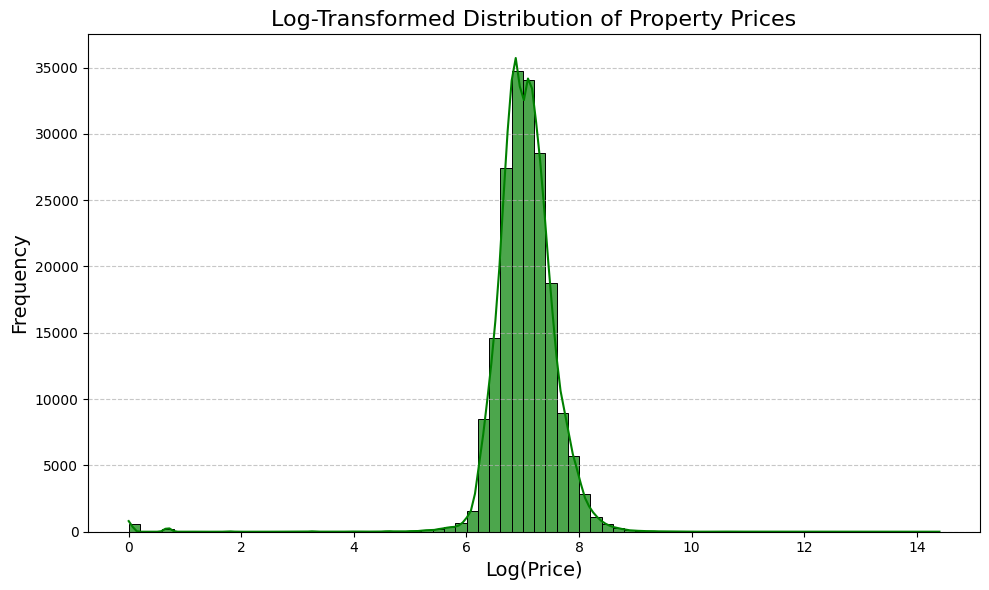

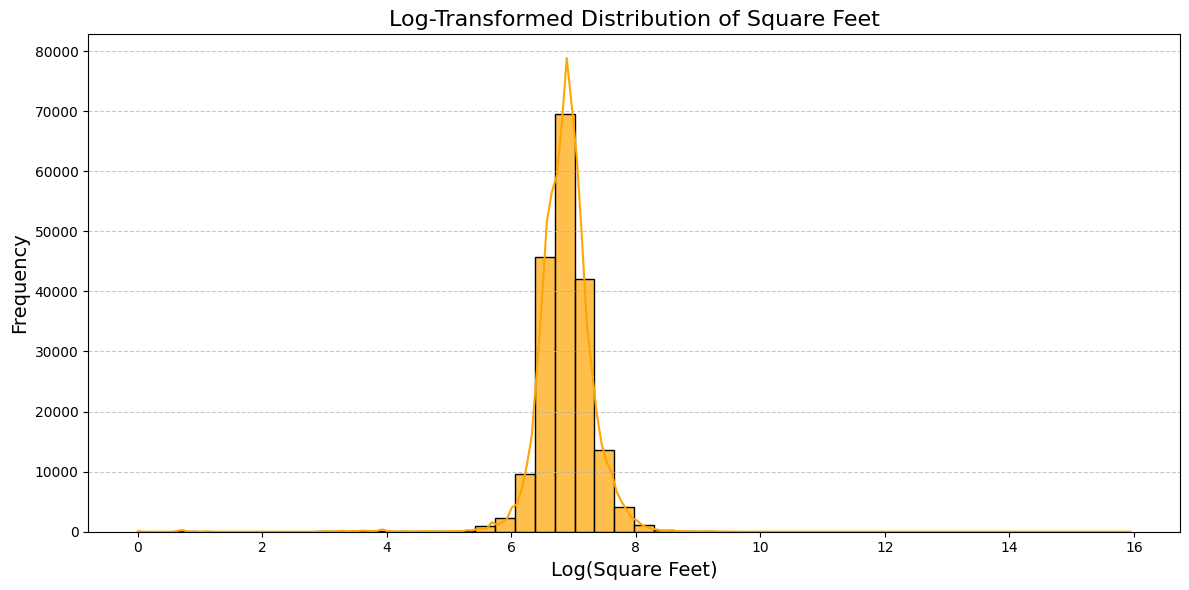

In [37]:
# Select numerical features
numerical_features = ['price', 'square_feet', 'bedrooms', 'bathrooms']

# Apply log transformation to skewed numerical features
housing_df['log_price'] = np.log1p(housing_df['price'])
housing_df['log_square_feet'] = np.log1p(housing_df['square_feet'])

# Plot transformed property price distribution
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['log_price'], binwidth=0.2, kde=True, color='green', alpha=0.7)
plt.title('Log-Transformed Distribution of Property Prices', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot transformed square feet distribution
plt.figure(figsize=(12, 6))
sns.histplot(housing_df['log_square_feet'], bins=50, kde=True, color='orange', alpha=0.7)
plt.title('Log-Transformed Distribution of Square Feet', fontsize=16)
plt.xlabel('Log(Square Feet)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Standardization**

Ensure numerical features are scaled to have a mean of 0 and a standard deviation of 1.

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize numerical features
housing_df[['std_price', 'std_square_feet', 'std_bedrooms', 'std_bathrooms']] = scaler.fit_transform(
    housing_df[['price', 'square_feet', 'bedrooms', 'bathrooms']]
)

# Verify the standardized values
print("Transformed Numerical Features:")
housing_df[['std_price', 'std_square_feet', 'std_bedrooms', 'std_bathrooms']].head()

Transformed Numerical Features:


,std_price,std_square_feet,std_bedrooms,std_bathrooms
0,-0.030564,-0.002827,0.240575,0.767892
1,-0.024672,-0.006652,0.002795,0.767892
2,0.044778,0.027225,0.002795,0.767892
3,-0.036568,-0.021206,-0.234986,-0.775258
4,-0.127884,-0.043956,-0.472767,-0.775258


**Max-Min Scaling**

Compress numerical range to [0, 1] to prevent any single feature from dominating the model, ensuring uniformly scale.

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply Min-Max scaling
housing_df[['minmax_price', 'minmax_square_feet', 'minmax_bedrooms', 'minmax_bathrooms']] = minmax_scaler.fit_transform(
    housing_df[['price', 'square_feet', 'bedrooms', 'bathrooms']]
)

# Verify the scaled values
print("Min-Max Scaled Numerical Features:")
housing_df[['minmax_price', 'minmax_square_feet', 'minmax_bedrooms', 'minmax_bathrooms']].describe()

Min-Max Scaled Numerical Features:


,minmax_price,minmax_square_feet,minmax_bedrooms,minmax_bathrooms
count,190428.000000,190428.000000,190428.000000,190428.000000
mean,0.000788,0.000135,0.001807,0.020032
std,0.004904,0.002400,0.003823,0.008640
min,0.000000,0.000000,0.000000,0.000000
25%,0.000475,0.000090,0.000909,0.013333
50%,0.000631,0.000115,0.001818,0.013333
75%,0.000844,0.000143,0.002727,0.026667
max,1.000000,1.000000,1.000000,1.000000


**Statistics Summary after Transformation**

*The following table summarizes the statistical properties of the features before and after transformations:*

1. **Original Features:** Captures the wide range and skewness of raw numerical features.

2. **Log-Transformed Features:** Reduces skewness by compressing extreme values.

3. **Standardized Features:** Centers data to a mean of 0 and standard deviation of 1.

4. **Max-Min Scaled Features:** Scales all features to a range between 0 and 1 for compatibility with neural networks and other models.

In [40]:
# Original numerical features
original_stats = housing_df[['price', 'square_feet', 'bedrooms', 'bathrooms']].describe()

# Log-transformed features
log_stats = housing_df[['log_price', 'log_square_feet']].describe()

# Standardized features
std_stats = housing_df[['std_price', 'std_square_feet', 'std_bedrooms', 'std_bathrooms']].describe()

# Min-max scaled features
minmax_stats = housing_df[['minmax_price', 'minmax_square_feet', 'minmax_bedrooms', 'minmax_bathrooms']].describe()

# Print summaries
print("Summary of Original Features:\n", original_stats)
print("\nSummary of Log-Transformed Features:\n", log_stats)
print("\nSummary of Standardized Features:\n", std_stats)
print("\nSummary of Min-Max Scaled Features:\n", minmax_stats)

Summary of Original Features:
               price   square_feet       bedrooms      bathrooms
count  1.904280e+05  1.904280e+05  190428.000000  190428.000000
mean   1.417770e+03  1.134909e+03       1.988248       1.502387
std    8.826512e+03  2.013171e+04       4.205564       0.648027
min    0.000000e+00  0.000000e+00       0.000000       0.000000
25%    8.550000e+02  7.590000e+02       1.000000       1.000000
50%    1.135000e+03  9.680000e+02       2.000000       1.000000
75%    1.520000e+03  1.200000e+03       3.000000       2.000000
max    1.800000e+06  8.388607e+06    1100.000000      75.000000

Summary of Log-Transformed Features:
            log_price  log_square_feet
count  190428.000000    190428.000000
mean        7.030684         6.866835
std         0.645844         0.464937
min         0.000000         0.000000
25%         6.752270         6.633318
50%         7.035269         6.876265
75%         7.327123         7.090910
max        14.403298        15.942385

Summary of 

In [41]:
# Save transformed features into a separate dataframe for modeling
transformed_features = housing_df[[
    'log_price', 'log_square_feet', 
    'std_price', 'std_square_feet', 'std_bedrooms', 'std_bathrooms',
    'minmax_price', 'minmax_square_feet', 'minmax_bedrooms', 'minmax_bathrooms'
]]

# Display the first few rows of the transformed dataframe
print("Transformed Features for Modeling:\n")
transformed_features.head()

Transformed Features for Modeling:



,log_price,log_square_feet,std_price,std_square_feet,std_bedrooms,std_bathrooms,minmax_price,minmax_square_feet,minmax_bedrooms,minmax_bathrooms
0,7.046647,6.983790,-0.030564,-0.002827,0.240575,0.767892,0.000638,0.000129,0.002727,0.026667
1,7.090910,6.909753,-0.024672,-0.006652,0.002795,0.767892,0.000667,0.000119,0.001818,0.026667
2,7.503290,7.428927,0.044778,0.027225,0.002795,0.767892,0.001007,0.000201,0.001818,0.026667
3,6.999422,6.563856,-0.036568,-0.021206,-0.234986,-0.775258,0.000608,0.000084,0.000909,0.013333
4,5.669881,5.525453,-0.127884,-0.043956,-0.472767,-0.775258,0.000161,0.000030,0.000000,0.013333


**Key Observations**

* Log Transformation: the log-transformed `price` and `square_feet` appear less skewed, reducing the impact of extreme outliers.

* Standardization: All numerical features now have a mean of 0 and a standard deviation of 1, optimizing them for distance-based models.

* Max-Min Scaling: Numerical features are now within fixed [0, 1] range, making them suitable for models sensitive to feature scales (neural networks).

##### **4.3 Feature Creation**
*Derive new features that can add predictive value to our ML model:*

1. Price per Square Foot: Captures how much each square foot costs, a commonly used metric in real estate.

2. Total Rooms: The sum of bedrooms and bathrooms, representing the overall capacity of the property.

3. US Region: Categorizes the property based on its location into East Coast, West Coast, Midwest, and South.

4. Animals Allowed: A binary feature indicating whether animals are allowed on the property.

**Price per Square Foot** 

Normalize price relative to property size.

In [42]:
# Create price per square foot column
housing_df['price_per_sqft'] = housing_df['price'] / housing_df['square_feet']

# Handle cases where square_feet is 0 to avoid division errors
housing_df['price_per_sqft'] = housing_df['price_per_sqft'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Verify the new feature
print("Price Per Square Foot Summary:")
housing_df['price_per_sqft'].describe()

Price Per Square Foot Summary:


count    190428.000000
mean          2.070799
std          24.458111
min           0.000000
25%           0.892857
50%           1.166667
75%           1.577934
max        2700.000000
Name: price_per_sqft, dtype: float64

**Total Rooms**

Overall capacity of the property - sum of bedrooms and bathrooms.

In [43]:
# Create total rooms feature
housing_df['total_rooms'] = housing_df['bedrooms'] + housing_df['bathrooms']

# Verify the new feature
print("Total Rooms Summary:")
housing_df['total_rooms'].describe()

Total Rooms Summary:


count    190428.000000
mean          3.490634
std           4.504087
min           1.000000
25%           2.000000
50%           3.500000
75%           4.000000
max        1175.000000
Name: total_rooms, dtype: float64

**US Region**

Categorize properties based on longitude into East Coast, West Coast, Midwest, and South. These regions often exhibit distinct price patterns.

In [44]:
# Define US Region boundaries based on longitude
def assign_region(longitude):
    if longitude <= -100:
        return 'West Coast'
    elif -100 < longitude <= -85:
        return 'Midwest'
    elif -85 < longitude <= -75:
        return 'South'
    else:
        return 'East Coast'

# Apply the region assignment
housing_df['us_region'] = housing_df['long'].apply(assign_region)

# Verify the new feature
print("US Region Distribution:")
housing_df['us_region'].value_counts()

US Region Distribution:


us_region
South         66369
Midwest       59954
West Coast    50990
East Coast    13115
Name: count, dtype: int64

**Animals Allowed**

Combining  `cats_allowed` and `dogs_allowed` to create a binary feature indicating whether animals are allowed on the property:

* 0: No animals allowed
* 1: Only dogs
* 2: Only cats
* 3: Both cats and dogs

In [45]:
# Create a combined animals_allowed feature
def animals_allowed(row):
    if row['cats_allowed'] == 1 and row['dogs_allowed'] == 1:
        return 3  # Both cats and dogs allowed
    elif row['dogs_allowed'] == 1:
        return 1  # Only dogs allowed
    elif row['cats_allowed'] == 1:
        return 2  # Only cats allowed
    else:
        return 0  # No animals allowed

# Apply the function to create the new feature
housing_df['animals_allowed'] = housing_df.apply(animals_allowed, axis=1)

# Verify the new feature
print(housing_df['animals_allowed'].value_counts())

# Drop the original columns
housing_df.drop(columns=['cats_allowed', 'dogs_allowed'], inplace=True)

animals_allowed
3    123041
0     55014
2      8318
1      4055
Name: count, dtype: int64


**Final Preperations pre-modeling** 

In [46]:
#convert all boolean values to integers
housing_df[housing_df.select_dtypes(include='bool').columns] = housing_df.select_dtypes(include='bool').astype(int)

In [47]:
#scaling price/removing skewness
housing_df['price'] = housing_df['log_price']

In [48]:
#dropping all non-numeric columns (covered through encoding)
housing_df.drop(columns = housing_df.select_dtypes(include=['object', 'string', 'boolean']).columns, inplace = True)
housing_df.drop(columns=['lat', 'long'], inplace=True)


In [49]:
#removing transformed features (duplicates) to transform during modeling
housing_df = housing_df.drop(columns=housing_df.filter(like='log').columns)
housing_df = housing_df.drop(columns=housing_df.filter(like='std').columns)
housing_df = housing_df.drop(columns=housing_df.filter(like='minmax').columns)

**Summary of New Features**

In [50]:
print(housing_df.columns)
new_columns = housing_df[['price_per_sqft', 'total_rooms', 'animals_allowed']]
new_columns.head()

Index(['price', 'square_feet', 'bedrooms', 'bathrooms', 'smoking_allowed',
       'wheelchair_access', 'ev_charging', 'furnished', 'type_encoded',
       'laundry_laundry on site', 'laundry_no laundry on site', 'laundry_none',
       'laundry_w/d hookups', 'laundry_w/d in unit', 'parking_carport',
       'parking_detached garage', 'parking_no parking', 'parking_none',
       'parking_off-street parking', 'parking_street parking',
       'parking_valet parking', 'state_al', 'state_ar', 'state_az', 'state_ca',
       'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'stat

,price_per_sqft,total_rooms,animals_allowed
0,1.064935,5.0,3
1,1.198801,4.0,0
2,1.077243,4.0,3
3,1.546610,2.0,3
4,1.156000,1.0,3


### **Part V:** Model Building and Training
*In this section, we will build and evaluate machine learning models to attempt to predict price of a property based on the features identified in the EDA.*



#### **5.1** Train-Test Split


In [51]:
# Store features except 'price' into a new df
features = housing_df.drop(columns=['price'])

# Store the target variable 'price' as a series
target = housing_df['price']

In [52]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% train, 20% test)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

5.1.1  **Standardizing Data**

We will explore both Linear Regression and Random Forest Models. Scaling in Linear Regression improves convergence and makes coefficients comparable and is especially important when adding penalty features in other forms of regression. While Random Forest is scale-invariant, scaling assists with
consistency when comparing models. Binary features, such as one-hot encoded variables, are left unscaled since they are already in a suitable form. Therefore, we standardize other feature of the data to better understand the outcome.

In [53]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to specific columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only the columns that need scaling
cols_to_scale = ['square_feet', 'bedrooms', 'bathrooms', 'price_per_sqft', 'total_rooms']
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#### **5.2** Model Training


5.2.1  **Basic Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on test data
y_pred = linear_reg.predict(X_test)

# Compute scores
linear_score = linear_reg.score(X_test, y_test)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)

# Display results
print("Linear Regression Metrics:")
print(f"R-squared Score: {linear_score:.4f}")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"Root Mean Squared Error: {linear_rmse:.2f}")

Linear Regression Metrics:
R-squared Score: 0.2338
Mean Squared Error: 0.32
Root Mean Squared Error: 0.57


5.2.1.1  **Model Evaluation**

**Model Analysis:**
 Considering a low R-squared score of only 0.2302 (MSE seems low due to scaling down of price features), linear regression does not seem to capture the full complexity of our model. Many of the features could either be highly correlated or non-linear, which this relatively simple model can not account for.

5.2.2 **Ridge Regression**

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score    

# Initialize and train model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_reg.predict(X_test)

# Compute scores
ridge_score = ridge_reg.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)

# Display results
print("Ridge Regression Metrics:")
print(f"R-squared Score: {ridge_score:.4f}")
print(f"Mean Squared Error: {ridge_mse:.2f}")
print(f"Root Mean Squared Error: {ridge_rmse:.2f}")


Ridge Regression Metrics:
R-squared Score: 0.2338
Mean Squared Error: 0.32
Root Mean Squared Error: 0.57


5.2.2.1  **Model Evaluation**

Ridge regression is a type of linear regression that uses L2 regularization to prevent overfitting. It adds a penalty term to the loss function that is proportional to the square of the magnitude of the coefficients. 
This penalty term helps to reduce the complexity of the model by shrinking the coefficients towards zero. Clearly, this model did not work any better than our original linear regression one (slightly worse). 
This suggests that are model does not cantain strong multicollinearity (as affirmed by correlation matrix) and instead must have multiple non-linear relationships that no form of linear regression can account for. While there
are other forms of regression we could try or PCA reduction (or hyperparameter tuning), that also help to eliminate overfitting and multicolinearity, we should instead turn to a non-linear model, such as random forests.

5.2.3 **Random Forest**

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split = 5, random_state=42)

# Train model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf_train = rf_regressor.predict(X_train_scaled)
y_pred_rf_test = rf_regressor.predict(X_test_scaled)

# Evaluate model
rf_r2_train = r2_score(y_train, y_pred_rf_train)
rf_r2_test = r2_score(y_test, y_pred_rf_test)
rf_mse = mean_squared_error(y_test, y_pred_rf_test)
rf_rmse = np.sqrt(rf_mse)

# Display results
print("Random Forest Regressor Metrics:")
print(f"Train Set R-squared value: {rf_r2_train:.4f}")
print(f"Test Set R-squared: {rf_r2_test:.4f}")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f}")

Random Forest Regressor Metrics:
Train Set R-squared value: 0.8887
Test Set R-squared: 0.8795
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22


5.2.3.1  **Model Evaluation**

Decision Trees function by splitting the dataset into smaller subsets based on the features and making predictions based on the target values in each subset. This enables the model to capture non-linear relationships, which linear regression fails to do. Random Forests are an ensemble of multiple decision trees that aggregate the predictions from each tree to make a final prediction. This enhances the model’s ability to generalize, as it is less sensitive to specific noise and better accounts for randomness and complexity in the data. Consequently, this reduces the chances of overfitting. However, hyperparameter tuning, especially for parameters such as maximum tree depth and the number of estimators, becomes crucial for optimizing performance in such models. As seen by the significantly highr R-squared score, this model was able to capture much more important relationships in our data than linear regression models. We can attempt to further improve it by tuning these parameters.

**5.2.3.2 Hyperparameter tuning: K-Folds Cross Validation**

In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'n_estimators': [50, 100], 
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5],
}

# Random Forest Regression object
rfr = RandomForestRegressor()

# Cross Validation with Randomized Search
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=16, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Random Search object to the training data
random_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
best = random_search.best_params_
print(best)

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}


These results suggest that the model benefits from using 100 estimators, a minimum of 2 samples for splitting (allowing for more specific splits), and a maximum tree depth of 10. This indicates that our previous model may have been too simple or underfit the data, resulting in higher bias. By increasing the depth and maintaining sufficient estimators, the model now captures more complexity while balancing performance.

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest model with optimal hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=best['n_estimators'], max_depth=best['max_depth'], min_samples_split=best['min_samples_split'], random_state=42)

# Train model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf_train = rf_regressor.predict(X_train_scaled)
y_pred_rf_test = rf_regressor.predict(X_test_scaled)

# Evaluate model
rf_r2_train = r2_score(y_train, y_pred_rf_train)
rf_r2_test = r2_score(y_test, y_pred_rf_test)
rf_mse = mean_squared_error(y_test, y_pred_rf_test)
rf_rmse = np.sqrt(rf_mse)

# Display results
print("Random Forest Regressor Metrics:")
print(f"Train Set R-squared value: {rf_r2_train:.4f}")
print(f"Test Set R-squared: {rf_r2_test:.4f}")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f}")

Random Forest Regressor Metrics:
Train Set R-squared value: 0.9965
Test Set R-squared: 0.9923
Mean Squared Error: 0.00
Root Mean Squared Error: 0.06


5.2.3.2  **Model Evaluation**


In this model, we change the max depth from 5 to 10 and the min samples from 5 to 2, increasing efficacy as seen by the high R-squared score. This allows the random forest to apply deeper decision trees, enabling the model to capture more complex relationships in the data. However, increasing the max depth can also increase the risk of overfitting if not carefully managed, as it may lead to the model becoming too specific to the training data and losing its ability to generalize well to new, unseen data. Overall, these paraemters produced the highest R-squared score. We can further experiment by increasing the number of estimators and further altering the depth, although running such models take significant amount of time.

### **Part VI:** Conclusions



#### **6.1** Overall Analysis

After evaluating both Linear Regression and Random Forest models, it is clear that Random Forest performed the best. This model successfully captured the complex, non-linear relationships within the data, which were the primary source of complexity. 
In contrast, the Linear Regression models did not perform as well, as they struggled to model these non-linear relationships effectively, which limited their ability to make accurate predictions.

#### **6.2** Future Steps

Hyperparameter tuning in the Random Forest model could further improve its performance (however, this could require using models that take significantly longer to compute). Additionally, exploring other non-linear models might help 
capture more of the data’s complexity. These models, while potentially more accurate, would require more computational power and GPU resources to run effectively.